### Análise preditiva do risco de diabetes em mulheres indianas Pima

Pima Indians Diabetes Dataset, é um dos conjuntos de dados mais renomados na área de aprendizado de máquina e estatística, especialmente voltado para problemas de classificação. Este dataset é amplamente utilizado para prever a ocorrência de diabetes em mulheres da tribo Pima, localizada no sudoeste dos Estados Unidos, com base em diversas medições biométricas.

O objetivo é construir modelos preditivos capazes de identificar a probabilidade de desenvolvimento de diabetes, considerando fatores como número de gravidezes, níveis de glicose no sangue, pressão arterial, índice de massa corporal, idade, entre outros



### 1 - Importar bibliotecas e carregar dados

#### 1.1 Importar bibliotecas

In [60]:
import warnings

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pickle import dump, load

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    KFold,
    cross_val_score,
    GridSearchCV,
)


#### 1.2 carregar o dataset

In [61]:
filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = pd.read_csv(filename, names=names)

### 2 - Resuma os dados

#### 2.1 Estatísticas descritivas

Começaremos confirmando as dimensões do conjunto de dados, por exemplo, o número de linhas e colunas.

In [62]:
# shape
print(dataset.shape)

(768, 9)


Vejamos também os tipos de dados de cada atributo

In [63]:
print(dataset.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


Vamos agora dar uma olhada nas primeiras 20 linhas dos dados.

In [64]:
print(dataset.head(20))

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

Vamos resumir a distribuição de cada atributo.

In [65]:
print(dataset.describe())

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

#### 2.2 Visualizações de dados

In [66]:
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

Distribuição de dados para a idade

Text(0.5, 0, 'age')

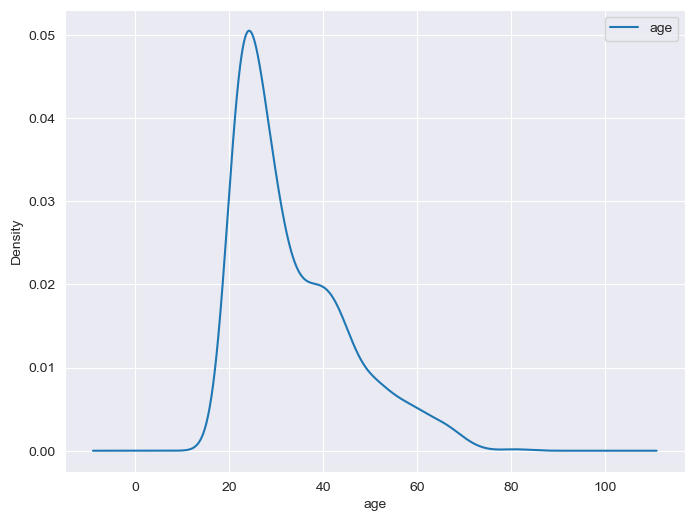

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)


dataset['age'].plot(kind='kde', ax=ax)


lines, label = ax.get_legend_handles_labels()
ax.legend(lines, label, loc='best')
ax.set_xlabel('age')

Text(0.5, 0, 'age')

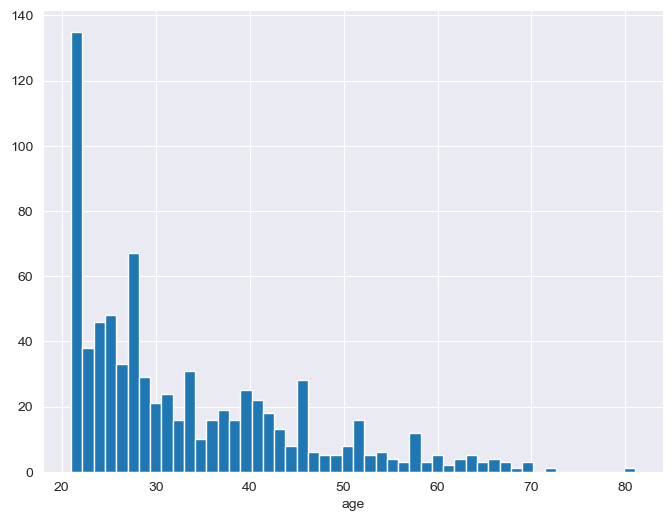

In [68]:
ax = dataset.age.hist(bins=50)
ax.set_xlabel('age')

Vamos dar uma olhada rápida no detalhamento dos valores de classe

In [69]:
dataset['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

Text(0.5, 1.0, 'Resultado da contagem')

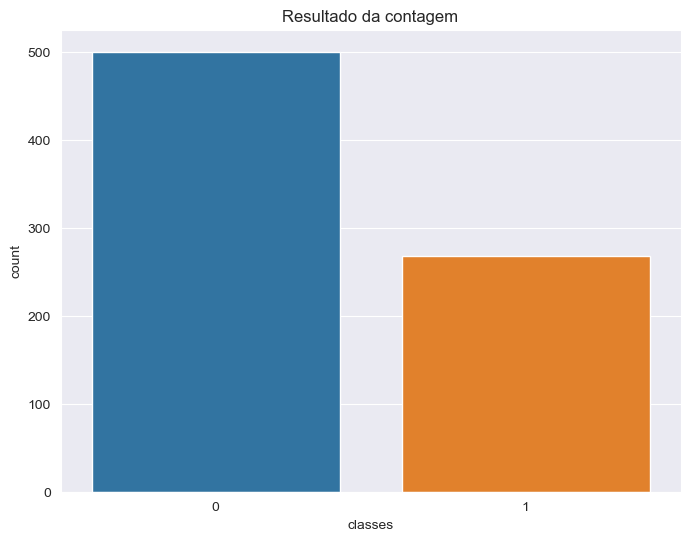

In [70]:
sns.countplot(x = 'class', data=dataset)
plt.xlabel('classes')
plt.title('Resultado da contagem')

Verifique a faixa etária com maior número de pacientes diabéticos

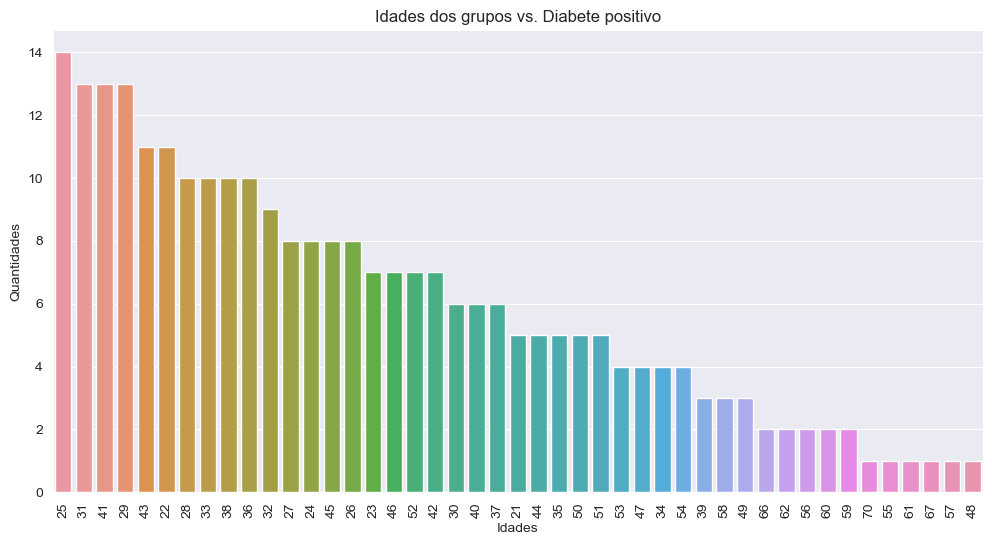

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(x='age', data=dataset[dataset['class'] == 1], order=dataset[dataset['class'] == 1]['age'].value_counts().index)
plt.title('Idades dos grupos vs. Diabete positivo')
plt.xlabel('Idades')
plt.ylabel('Quantidades')
plt.xticks(rotation=90)  
plt.show()

É evidente no gráfico acima que o maior número de pacientes diabéticos é detectado aos 25 anos, seguido pelos 31 anos. Isso leva à suposição de que indivíduos na faixa etária de 25 a 31 anos têm maior probabilidade de desenvolver diabetes.

#### Observando outliers



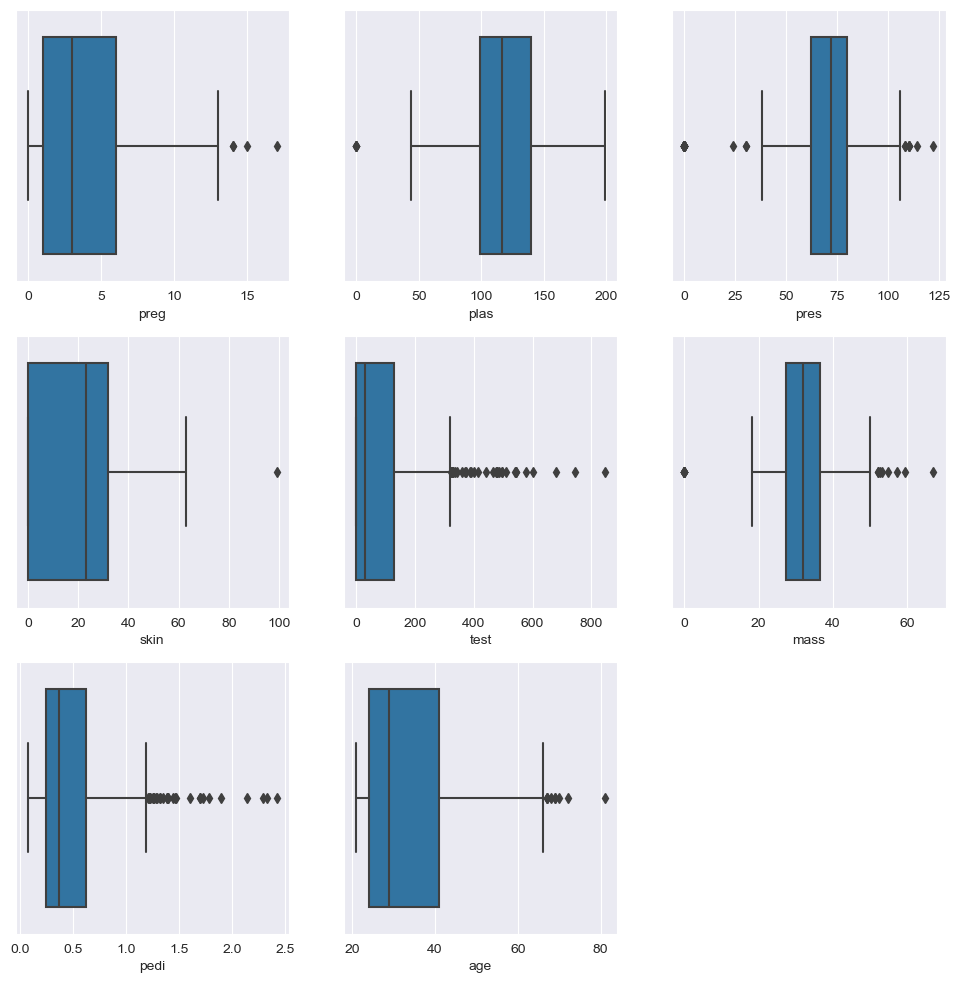

In [72]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=col, data=dataset)
plt.show()

#### Abordando exceções no recurso Idade

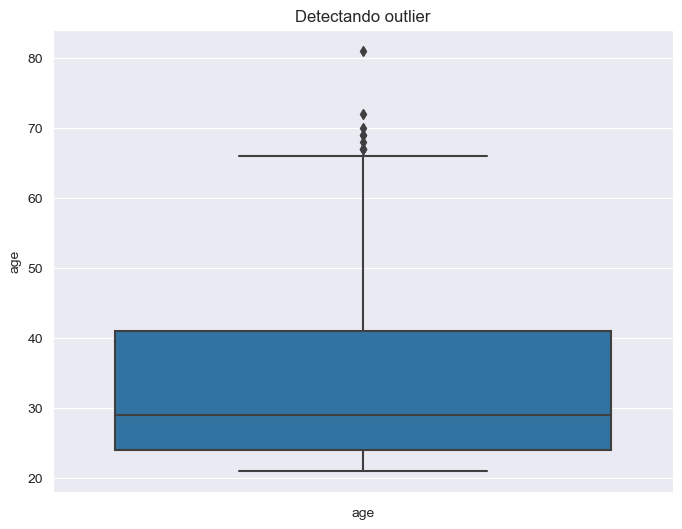

In [73]:
sns.boxplot(y=dataset['age'], data=dataset)
plt.title('Detectando outlier')
plt.xlabel('age')
plt.show()

#### Detecting outliers

In [74]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1-1.5*IQR ) | (df[column] > Q3+1.5*IQR)]

In [75]:
outliers = detect_outliers_iqr(dataset, 'age')
outliers

,preg,plas,pres,skin,test,mass,pedi,age,class
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


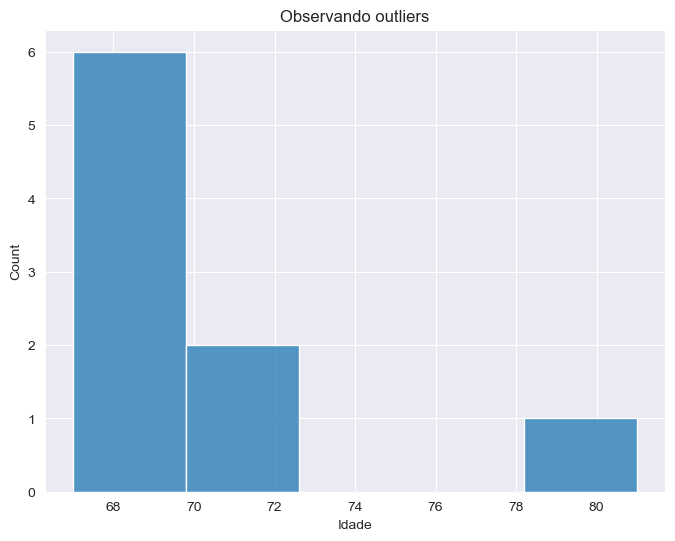

In [76]:
sns.histplot(x='age', data=outliers)
plt.xlabel('Idade')
plt.title('Observando outliers')
plt.show()

#### Imputing the outlier

In [77]:
def quantile_based_flooring_and_capping(column):
    """
    In this technique, the outlier is capped at a certain value above 
    the 90th percentile value or floored at a factor below the 10th 
    percentile value. Python code to delete the outlier and copy 
    the rest of the elements to another array
    """

    tenth_percentile = np.percentile(column, 10)
    ninetieth_percentile = np.percentile(column, 90)

    data = np.where(column < tenth_percentile, tenth_percentile, column)
    data = np.where(column > ninetieth_percentile,
                    ninetieth_percentile, column)
    return [int(i) for i in data]

In [78]:
ages = quantile_based_flooring_and_capping(dataset['age'].values)
dataset['age'] = ages

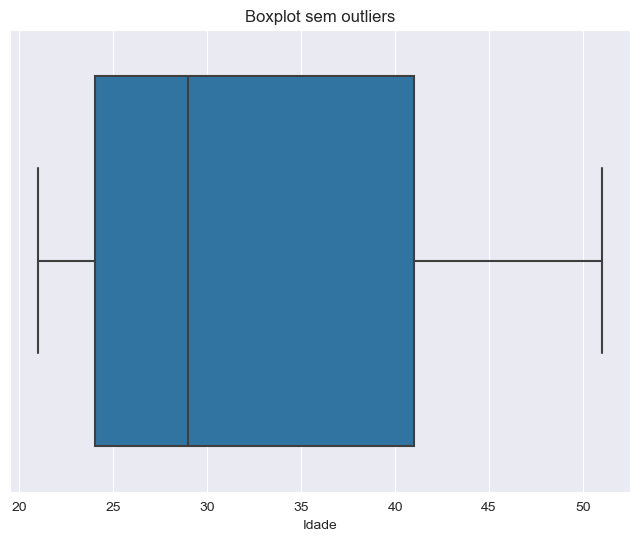

In [79]:
sns.boxplot(x='age', data=dataset)
plt.xlabel('Idade')
plt.title('Boxplot sem outliers')
plt.show()

### 3 - Preparar dados

- limpeza de dados
- seleção de recursos
- transformação de dados

### 4 - Avalie Algoritmos

#### 4.1 Conjunto de dados de validação dividido

In [80]:
# Split-out validation dataset
arr = dataset.values
X = arr[:,0:8]
Y = arr[:,8]
test_size = .20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

#### 4.2 Opções de teste e métrica de avaliação

In [81]:
num_folds = 10
seed = 7
scoring = 'accuracy'

Vamos criar uma linha de base de desempenho neste problema e verificar vários algoritmos diferentes. Selecionaremos um conjunto de algoritmos diferentes capazes de trabalhar neste problema de classificação. Os seis algoritmos selecionados incluem:

- **Linear Algorithms**: Logistic Regression (LR) and Linear Discriminant Analysis (LDA)
- **Nonlinear Algorithms**: Classification and Regression Trees (CART), Support Vector
Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).


In [82]:
# Spot-Check Algorithms

models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Todos os algoritmos usam parâmetros de ajuste padrão. Vamos comparar os algoritmos. Exibiremos a média e o desvio padrão de precisão para cada algoritmo à medida que o calculamos e coletaremos os resultados para uso posterior

In [83]:
results = []
names = []
means = []
stds = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    means.append(f"{cv_results.mean()*100.00:.3f}%")
    stds.append(f"{cv_results.std()*100.00:.3f}%")

result_df = pd.DataFrame({
    'Model': names,
    "Mean Score": means,
    "Std  Deviation": stds
})

print(result_df)


  Model Mean Score Std  Deviation
0    LR    76.544%         3.525%
1   LDA    76.219%         3.558%
2   KNN    71.169%         3.230%
3  CART    67.428%         3.361%
4    NB    74.757%         3.160%
5   SVM    75.734%         2.007%


### 5 - Melhore a precisão


In [84]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=500))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

results = []
names = []
means = []
stds = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    means.append(f"{cv_results.mean()*100:.3f}%")
    stds.append(f"{cv_results.std()*100:.3f}%")


result_df = pd.DataFrame({
    'Model': names,
    "Mean Score": means,
    "Std Deviation": stds
})

print(result_df)

        Model Mean Score Std Deviation
0    ScaledLR    76.095%        5.321%
1   ScaledLDA    76.259%        5.706%
2   ScaledKNN    71.518%        4.323%
3  ScaledCART    67.285%        5.028%
4   ScaledSVM    74.135%        4.194%


#### 5.1 Ajuste do algoritmo

Nesta seção, investigamos o ajuste dos parâmetros para dois algoritmos que se mostram promissores na verificação pontual da seção anterior: KNN e CART.

#### 5.1.1 Ajustar KNN

In [85]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print(f"Best: {grid_result.best_score_*100.00:.3f}% using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

print()
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean*100.00:.3f} ({stdev}) with {param}")

Best: 73.308% using {'n_neighbors': 15}

69.376 (0.03515460844458018) with {'n_neighbors': 1}
71.507 (0.05163457165805058) with {'n_neighbors': 3}
71.351 (0.038947790351216156) with {'n_neighbors': 5}
70.368 (0.032963192993154776) with {'n_neighbors': 7}
70.201 (0.03652807898295653) with {'n_neighbors': 9}
72.329 (0.049401062954834644) with {'n_neighbors': 11}
72.168 (0.046373266434372805) with {'n_neighbors': 13}
73.308 (0.04338397212686182) with {'n_neighbors': 15}
72.821 (0.039889605249499686) with {'n_neighbors': 17}
71.195 (0.05616765765764771) with {'n_neighbors': 19}
71.854 (0.06172996772242338) with {'n_neighbors': 21}


### 5.1.2 Ajustar CART

In [86]:
# Tune scaled CART
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15],  # Depth of the tree
    'min_samples_split': [2, 5, 10, 15],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4, 6],  # Minimum samples at a leaf node
    'criterion': ['gini', 'entropy']  # Split criterion
}

model = DecisionTreeClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


results = list(zip(means, stds, params))

results_sorted = sorted(results, key=lambda x: x[0])

for mean, stdev, param in results_sorted[:10]:
    print(f"{mean*100.00:.3f}% ({stdev}) with: {param}")


Best: 0.734770 using {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
65.484% (0.054481009799956834) with: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5}
65.653% (0.057167697768568726) with: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}
65.820% (0.06084852351474713) with: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2}
66.142% (0.04254185288639813) with: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
66.481% (0.05812880714728142) with: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 5}
66.629% (0.04120756433438386) with: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
66.631% (0.03315921039331233) with: {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}
66.634% (0.054086036901951566) with: {

#### 5.2 Conjuntos (Ensembe Methods)

Outra maneira de melhorar o desempenho dos algoritmos nesse problema é usando métodos de conjunto. Nesta seção, avaliaremos quatro algoritmos diferentes de aprendizado de máquina de conjunto, dois métodos de reforço e dois de ensacamento:

- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).

### 6 - Finalizar modelo

O CART mostrou-se mais promissor como um modelo de baixa complexidade e estável para este problema. 

Nesta seção, finalizaremos o modelo treinando-o em todo o conjunto de dados de treinamento e faremos previsões para o conjunto de dados de validação para confirmar nossas descobertas. 

In [87]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = DecisionTreeClassifier(
    random_state=seed,
    max_depth=13,
    min_samples_split=2,
    min_weight_fraction_leaf=0.1,  # Corrected value within the valid range [0.0, 0.5]
    criterion='gini'
)

model.fit(rescaledX, Y_train)


rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)

print(f"pred: {predictions}")


print(f"Accuracy on validation set: {accuracy_score(Y_test, predictions)*100.00:.3f}%")

print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))



pred: [0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
Accuracy on validation set: 75.325%
[[88  9]
 [29 28]]
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82        97
         1.0       0.76      0.49      0.60        57

    accuracy                           0.75       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



#### 6.1 Salvar o modelo

In [88]:
model_name = '../models/finalized_model.sav'
scaler_name = '../models/scaler.sav'

dump(model, open(model_name, 'wb'))
dump(scaler, open(scaler_name, 'wb'))


loaded_model = load(open(model_name, 'rb'))  


predictions = loaded_model.predict(rescaledValidationX)


accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy on validation set: {accuracy * 100.00:.3f}%")


print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy on validation set: 75.325%
[[88  9]
 [29 28]]
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82        97
         1.0       0.76      0.49      0.60        57

    accuracy                           0.75       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154

